## Stock Sentiment Analysis using News Headlines

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.dpi'] = (120)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df=pd.read_csv('Data_Stock_Sentiment_Analysis.csv',encoding = "ISO-8859-1")
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [5]:
# nan_df = df[df.isna().any(axis=1)]
# nan_df.describe
df.isna().sum().sort_values(ascending = False)

Top25    3
Top24    3
Top23    1
Top13    0
Top22    0
Top21    0
Top20    0
Top19    0
Top18    0
Top17    0
Top16    0
Top15    0
Top14    0
Date     0
Label    0
Top11    0
Top10    0
Top9     0
Top8     0
Top7     0
Top6     0
Top5     0
Top4     0
Top3     0
Top2     0
Top1     0
Top12    0
dtype: int64

In [6]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [7]:
train.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3970,2015-12-24,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",Irish government rules out fracking in the Rep...,Americans in Beijing warned of terrorism threa...,"Shin Bet arrests Nazareth area cousins, ISIS o...",Baghdad holds Christmas celebrations out of re...,French cabinet backs plans to embed emergency ...,Report on sexual exploitation and abuse by pea...,Baby girl dies after X-president's son's staff...,China smog sparks red alerts in 10 cities,US planned East Berlin's 'systematic destructi...,Qatar World Cup 2022 workers 'earning as littl...,Thai Court Sentences Two to Death for Killings...,Germany Pays to Halt Danish Wind Power to Prot...,Egypts President Sisi Urges Islamic Scholars t...,Russia Rejects Amnesty Internationals Report o...,"Cameron, Osborne and Murdoch back together at ..."
3971,2015-12-28,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",Japan apologizes to Korea over sexual enslavem...,Milan and Rome ban cars as pollution rises. Mi...,Saudi posts record $98 bn deficit in 2015,"The United States, Russia, Iran, and Saudi Ara...",Vladimir Putin has achieved his central goal o...,Noted Syrian journalist who uncovered ISIS Ale...,Criminal gangs are contaminating democracy in ...,ISIS leader threatens to strike Israel,Schools do not have to teach non-religious wor...,Iraqi army declares first major victory over I...,Syrian journalist &amp; filmmaker who exposed ...,"Train carrying 200,000 litres (44,000 gallons)...","Stoner Sloth was $500,000 well spent, insists ...",Saudi Arabia Plans Subsidy Cuts as King Unveil...,Syria anti-ISIS documentary maker 'assassinate...,Denmark wants Geneva Convention debate if Euro...,David Cameron is heckled during visit to flood...,British Army Is Deployed as Flooding Submerges...,Brazils reluctance to accept an Israeli ambass...,Russian GDP down 4.0 percent year-on-year in N...,Syria and Iraq: Ethnic cleansing by Sunni and ...,Deadly car bomb explodes at Kabul airport,Experiment in Germany tests the idea of an 'em...
3972,2015-12-29,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Giant Squid in Japan,Muslims tell ISIS they'd rather see Star Wars ...,Syrian Journalist Who Documented ISIS Atrociti...,North Korea's second most-powerful man sent to...,Austria Turns Away Hundreds of Migrants for Ly...,Saudi Grand Mufti calls ISIS part of the Israe...,"'What has war yielded, neither land nor heaven...",Ancient arch attacked by ISIS to be rebuilt in...,Islamic State theologians have issued an extre...,A new type of basaltic rock has been discovere...,Belgians arrest 2 accused in New Year's terror...,Germany gives green light to bicycle highways,"""Chinese companies that helped fuel the global...",Five years in jail for men who 'emotionally bu...,Iran Hands Over Stockpile of Enriched Uranium ...,Registrar Shuts Down All Pirate Bay Domain Names,The Irish Government has taken unprecedented a...,Saudi Arabia to raise domestic petrol prices b...,Saudi Arabia hikes petrol prices by 40% at the...,World Health Organization declares Guinea Ebol...,Hacker group Anonymous is helping the 'Making ...,Russia 'has removed uranium from Iran',China threatens to shoot down Australian aircr...,Israel warns Brazil to accept its settler amba...
3973,2015-12-30,0,Tech companies face criminal charges if they n...,Mexican marijuana fa

### Removing punctuations

In [8]:
data=train.iloc[:,2:27]
data #input_cols

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greenel

https://stackoverflow.com/questions/56619521/replace-a-cell-in-dataframe-following-a-regex-in-dataframe-pandas

In [9]:
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later .

### Renaming column names for ease of access

In [10]:
list1= [i for i in range(25)]
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [11]:
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jai

### Convertng headlines to lower case

In [12]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,hammers hand robson a youthful lesson,saints party like it s,wear wolves have turned into lambs,stump mike catches testy gough s taunt,langer escapes to hit,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,a tale of two tails,i say what i like and i like what i say,elbows eyes and nipples,task force to assess risk of asteroid collision,how i found myself at last,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,pele turns up heat on ferguson,party divided over kohl slush fund scandal,manchester united england,women in record south pole walk,vasco da gama brazil,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,our choice not theirs,profile of former us nazi party officer willia...,new evidence shows record of war crimes suspec...,the rise of the supernerds,written on the body,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,met faces fresh attack on race crime,everton fans top racist league of shame,our breasts ourselves,russia s new boss has an extremely strange his...,always and forever,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jai

In [13]:
data.iloc[1,:]

0                                             scorecard
1                                   the best lake scene
2                         leader  german sleaze inquiry
3                                         cheerio  boyo
4                              the main recommendations
5                                has cubie killed fees 
6                                has cubie killed fees 
7                                has cubie killed fees 
8     hopkins  furious  at foster s lack of hannibal...
9                                has cubie killed fees 
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows  eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

##### .join(str(x) for x in input)

In [14]:
' '.join(str(x) for x in data.iloc[1,:])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 3974
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3975 non-null   object
 1   1       3975 non-null   object
 2   2       3975 non-null   object
 3   3       3975 non-null   object
 4   4       3975 non-null   object
 5   5       3975 non-null   object
 6   6       3975 non-null   object
 7   7       3975 non-null   object
 8   8       3975 non-null   object
 9   9       3975 non-null   object
 10  10      3975 non-null   object
 11  11      3975 non-null   object
 12  12      3975 non-null   object
 13  13      3975 non-null   object
 14  14      3975 non-null   object
 15  15      3975 non-null   object
 16  16      3975 non-null   object
 17  17      3975 non-null   object
 18  18      3975 non-null   object
 19  19      3975 non-null   object
 20  20      3975 non-null   object
 21  21      3975 non-null   object
 22  22      3974 non-null   

In [16]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25])) 
type(headlines)

list

In [17]:
headlines[10]

'england s elite set for pay struggle robson puts his job on the line old firm lobby to replace uefa cup babbel to check in at anfield for muralitharan read macgill all padded up with nowhere to go individuals who support the alliance the best omen scene the patent importance of our genetic blueprint german opposition crisis as party meets on scandal a high not to be sniffed at just you wait the one that got away feel the quality the whole story plus points dicaprio considering anakin skywalker role  no question  of a decision on pinochet today tesco s silence refuels m s rumour irving claims mad or mendacious  court told moratti joins gmg in venture capital firm peak practice sex claims criticised baddiel and skinner back for itv outright quackery how to avoid the quacks'

# RandomForest for NLP

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

### BAG OF WORDS

In [19]:
countvector = CountVectorizer(ngram_range=(2,2))
train_dataset = countvector.fit_transform(headlines)

In [20]:
list(countvector.get_feature_names_out())

['aa contract',
 'aa jeanette',
 'aa milne',
 'aa pakistan',
 'aa staff',
 'aa tries',
 'aaa credit',
 'aaa rating',
 'aaa seal',
 'aaa to',
 'aaaw nice',
 'aab in',
 'aabo was',
 'aadmi party',
 'aafia disappeared',
 'aafia siddiqui',
 'aah bbc',
 'aah camara',
 'aah fat',
 'aali where',
 'aam aadmi',
 'aamer the',
 'aamir khan',
 'aamir was',
 'aap circumcision',
 'aap party',
 'aaron swartz',
 'aaronovitch an',
 'aaronovitch are',
 'aaronovitch chaos',
 'aaronovitch criticism',
 'aaronovitch defend',
 'aaronovitch do',
 'aaronovitch griffin',
 'aaronovitch has',
 'aaronovitch howard',
 'aaronovitch migrant',
 'aaronovitch no',
 'aaronovitch on',
 'aaronovitch political',
 'aaronovitch pr',
 'aaronovitch shame',
 'aaronovitch the',
 'aaronovitch whatever',
 'aaronovitch why',
 'aarp on',
 'ab in',
 'ab jackson',
 'ababa where',
 'aback by',
 'abadan one',
 'abadi said',
 'abajo mpc',
 'aban pearl',
 'abandon afghanistan',
 'abandon an',
 'abandon anfield',
 'abandon crimea',
 'abando

In [21]:
print(headlines[1]) # train_X
print(train_dataset[1].toarray()) # train_y

scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite
[[0 0 0 ... 0 0 0]]


In [22]:
%%time
model = RandomForestClassifier(n_estimators=200,criterion='entropy'
                               ,n_jobs=-1, random_state=42)
model.fit(train_dataset,train['Label']) # only fit trainning_input & trainning_target

CPU times: user 1min 52s, sys: 852 ms, total: 1min 53s
Wall time: 31 s


RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [23]:
type(train_dataset)

scipy.sparse.csr.csr_matrix

In [24]:
train_preds =  model.predict(train_dataset)

In [25]:
train_score=accuracy_score(train['Label'],train_preds)
train_score

1.0

### No need to plot : caos

In [26]:
importance_df = pd.DataFrame({
    'feature': list(countvector.get_feature_names_out()),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [27]:
importance_df

,feature,importance
356823,of your,0.000589
161103,england india,0.000493
455655,sexual violence,0.000449
560155,wealth of,0.000430
372070,over at,0.000410
...,...,...
214090,government releases,0.000000
214089,government relaxes,0.000000
214087,government reiterates,0.000000
214086,government regulators,0.000000


In [28]:
# plt.title('Feature Importance')
# sns.barplot(data=importance_df.head(30), x='importance', y='feature');

### Predict for the Test Dataset

In [29]:
test.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3723,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,Salaries for top CEOs rose twice as fast as av...,"Norway violated equal-pay law, judge says: Jud...",Imam wants radical recruiters of Muslim youth ...,"Saudi Arabia beheaded 83 people in 2014, the m...",'A living hell' for slaves on remote South Kor...,"Worlds 400 richest get richer, adding $92bn in...","Rental Car Stereos Infringe Copyright, Music R...",Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
3724,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,"After Decades of Searching, the Causeway for t...",India lost 64 tigers in 2014,"Lizard Squad hacking of Sony was ""huge marketi...",Russia 'may face chaos' if extra sanctions imp...,The Saudi air and land forces carry out an att...,ISIL is reportedly setting up a bank in attemp...,Israel to brand anti-assimilation group Lehava...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps


In [30]:
test.iloc[:,2:27].head(2)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3723,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,Salaries for top CEOs rose twice as fast as av...,"Norway violated equal-pay law, judge says: Jud...",Imam wants radical recruiters of Muslim youth ...,"Saudi Arabia beheaded 83 people in 2014, the m...",'A living hell' for slaves on remote South Kor...,"Worlds 400 richest get richer, adding $92bn in...","Rental Car Stereos Infringe Copyright, Music R...",Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
3724,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,"After Decades of Searching, the Causeway for t...",India lost 64 tigers in 2014,"Lizard Squad hacking of Sony was ""huge marketi...",Russia 'may face chaos' if extra sanctions imp...,The Saudi air and land forces carry out an att...,ISIL is reportedly setting up a bank in attemp...,Israel to brand anti-assimilation group Lehava...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps


In [31]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [32]:
test.iloc[row,2:27] # without index

Top1     A 117-year-old woman in Mexico City finally re...
Top2      IMF chief backs Athens as permanent Olympic host
Top3     The president of France says if Brexit won, so...
Top4     British Man Who Must Give Police 24 Hours' Not...
Top5     100+ Nobel laureates urge Greenpeace to stop o...
Top6     Brazil: Huge spike in number of police killing...
Top7     Austria's highest court annuls presidential el...
Top8     Facebook wins privacy case, can track any Belg...
Top9     Switzerland denies Muslim girls citizenship af...
Top10    China kills millions of innocent meditators fo...
Top11    France Cracks Down on Factory Farms - A viral ...
Top12    Abbas PLO Faction Calls Killer of 13-Year-Old ...
Top13    Taiwanese warship accidentally fires missile t...
Top14    Iran celebrates American Human Rights Week, mo...
Top15    U.N. panel moves to curb bias against L.G.B.T....
Top16    The United States has placed Myanmar, Uzbekist...
Top17    S&amp;P revises European Union credit rating t.

In [33]:
%%time
test_dataset = countvector.transform(test_transform)
test_preds = model.predict(test_dataset)

CPU times: user 1.75 s, sys: 125 ms, total: 1.87 s
Wall time: 775 ms


In [34]:
matrix=confusion_matrix(test['Label'],test_preds)
print(matrix)
test_score=accuracy_score(test['Label'],test_preds)
print(test_score)
report=classification_report(test['Label'],test_preds)
print(report)

[[137  49]
 [  8 184]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       186
           1       0.79      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



In [35]:
df['Label'].value_counts()

1    2166
0    1935
Name: Label, dtype: int64

In [36]:
test['Label'].value_counts()/len(test['Label'])

1    0.507937
0    0.492063
Name: Label, dtype: float64

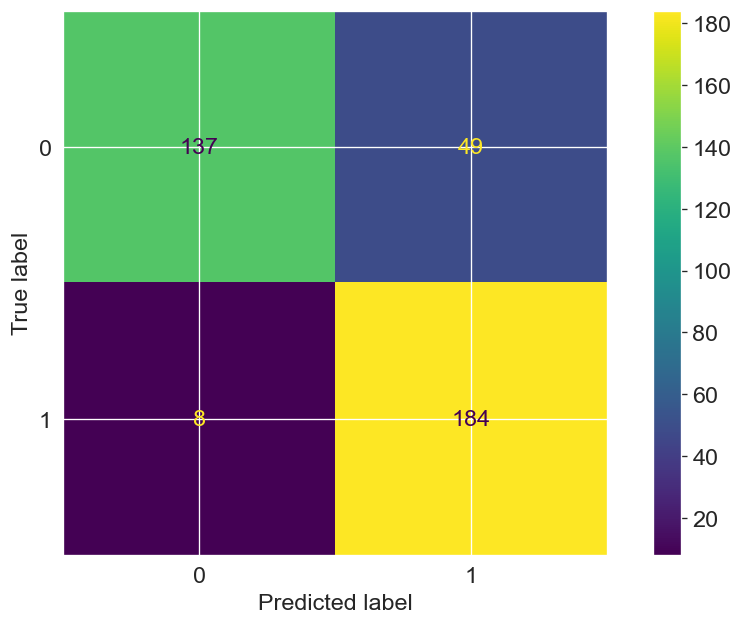

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

# Using TfidfVectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidtvector = TfidfVectorizer(ngram_range=(2,2))
newtrain_dataset = tfidtvector.fit_transform(headlines)

In [40]:
%%time
model_tfid = RandomForestClassifier(n_estimators=200,
                                    criterion='entropy')

model_tfid.fit(newtrain_dataset,train['Label'])

CPU times: user 48.2 s, sys: 216 ms, total: 48.4 s
Wall time: 48.6 s


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [41]:
newtest_transform= []
for row in range(0,len(test.index)):
    newtest_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [42]:
newtest_dataset = tfidtvector.transform(newtest_transform)
newtest_preds = model_tfid.predict(newtest_dataset)

In [43]:
matrix=confusion_matrix(test['Label'],newtest_preds)
print(matrix)
test_score=accuracy_score(test['Label'],newtest_preds)
print(test_score)
report=classification_report(test['Label'],newtest_preds)
print(report)

[[144  42]
 [ 12 180]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       186
           1       0.81      0.94      0.87       192

    accuracy                           0.86       378
   macro avg       0.87      0.86      0.86       378
weighted avg       0.87      0.86      0.86       378



### TfidfVectorizer + naive_bayes: FN turn into 0

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
tfidtvector = TfidfVectorizer(ngram_range=(2,2))
train_dataset = tfidtvector.fit_transform(headlines)

In [46]:
model_nb = MultinomialNB().fit(train_dataset,train['Label'])
model_nb

MultinomialNB()

In [47]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [48]:
test_dataset = tfidtvector.transform(test_transform)

In [49]:
test_preds = model_nb.predict(test_dataset)

In [50]:
matrix=confusion_matrix(test['Label'],test_preds)
print(matrix)
test_score=accuracy_score(test['Label'],test_preds)
print(test_score)
report=classification_report(test['Label'],test_preds)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [52]:
test['Label']

3723    1
3724    0
3725    0
3726    1
3727    1
       ..
4096    0
4097    1
4098    1
4099    1
4100    1
Name: Label, Length: 378, dtype: int64

In [53]:
test_preds.shape

(378,)